In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

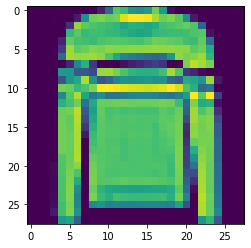

In [4]:
plt.imshow(X_train_full[5,:].reshape(28,28))

In [5]:
#creating a validation set 
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Building a neural network

In [7]:
#creates a single stack of layers connected sequentially
model = keras.models.Sequential()

In [8]:
#this is a Flatten layer. It converts the specified input shape into a (-1,1) instance. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

In [9]:
#next we add the first hidden layer containing 300 neurons. It will use the Rectified Linear Unit Activation Function(ReLU). 
#This does not include bias terms 
model.add(keras.layers.Dense(300, activation = "relu"))

In [10]:
#next we add another hidden layer with 100 neurons in it
model.add(keras.layers.Dense(100, activation = "relu"))

In [11]:
#last we add in the output layer which has 10 neurons for the 10 different classes
model.add(keras.layers.Dense(10, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
weights, biases = model.layers[1].get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

The shape of the weight matrix is dependant on the number of inputs. This is why input_shape should be specified in keras.layers.Flatten. 

In [17]:
#using compile method to specify the loss function, optimizer to use and extra metrics to compute during training 
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "sgd",
                metrics = ["accuracy"])

In [18]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
keras.utils.to_categorical(y_train_full)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
history = model.fit(X_train,y_train,epochs = 30, 
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0177 - accuracy: 0.6774 - val_loss: 0.5083 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5019 - accuracy: 0.8260 - val_loss: 0.4462 - val_accuracy: 0.8444
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4533 - accuracy: 0.8397 - val_loss: 0.4223 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4241 - accuracy: 0.8514 - val_loss: 0.4298 - val_accuracy: 0.8546
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4020 - accuracy: 0.8578 - val_loss: 0.3853 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3816 - accuracy: 0.8626 - val_loss: 0.3716 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3691 - accuracy: 0.8697 - val_loss: 0.3586 - val_accuracy:

For skewed datasets with some classes being overrepresented while others are underrepresented, it would be useful to set the class_weight argument in the fit method. 

For cases where we want instances to be given different weights, like in the case of outliers (NBA dataset), we need to use sample_weight. For sample_weight we can either pass a flat Numpy array with the same length as the input samples. 

In [21]:
import pandas as pd
df = pd.DataFrame(data = history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.726252,0.760909,0.508309,0.8264
1,0.489002,0.829818,0.446228,0.8444
2,0.444729,0.842582,0.422281,0.8590
3,0.418764,0.852145,0.429752,0.8546
4,0.397985,0.859764,0.385349,0.8644
5,0.381799,0.863782,0.371586,0.8694
6,0.368400,0.869345,0.358623,0.8722
7,0.355897,0.873727,0.368232,0.8666
8,0.345181,0.876418,0.350674,0.8754
9,0.336118,0.880400,0.346814,0.8794


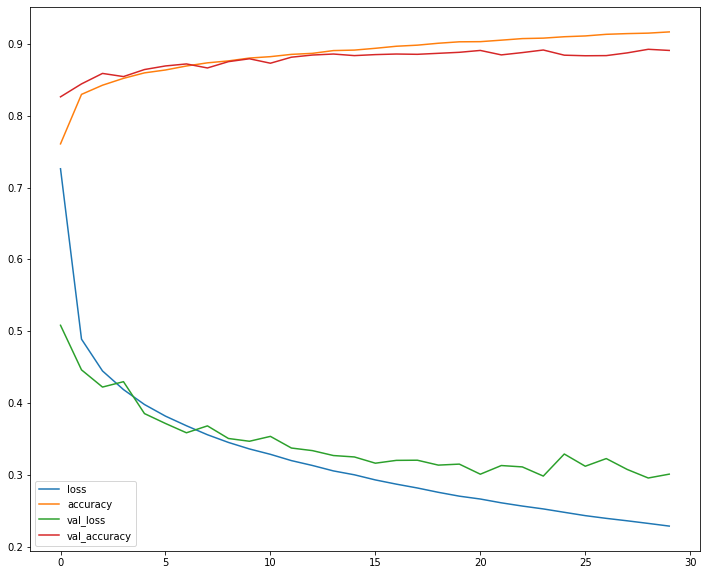

In [22]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (12,10))
ax.plot(df.index.values.tolist(),df["loss"], label = "loss")
ax.plot(df.index.values.tolist(),df["accuracy"], label = "accuracy")
ax.plot(df.index.values.tolist(),df["val_loss"], label = "val_loss")
ax.plot(df.index.values.tolist(),df["val_accuracy"], label = "val_accuracy")
ax.legend()

In [23]:
model.evaluate(X_test, y_test, return_dict=True)

313/313 [==============================] - 1s 2ms/step - loss: 64.8549 - accuracy: 0.8486


{'loss': 64.85486602783203, 'accuracy': 0.8485999703407288}

Making predictions using a model

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
#y_proba.round(2)

In [25]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
model.predict_classes(X_new)

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

<h2> Building a Regression MLP using the Sequential API </h2> 

In [27]:
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)

In [28]:
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg_scaled = scaler.fit_transform(x_train_reg)
x_valid_reg_scaled = scaler.transform(x_valid_reg)
x_test_reg_scaled = scaler.transform(x_test_reg)

In [29]:
model_reg = keras.models.Sequential()

In [30]:
#adding input layer
model_reg.add(keras.layers.InputLayer(input_shape = x_train_reg_scaled.shape[1:]))
model_reg.add(keras.layers.Dense(30, activation = "relu"))
#the output neuron has no activation function to it
model_reg.add(keras.layers.Dense(1))

In [31]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [32]:
#no need to always add the input_layer. We can always user keras.layers.Dense
model_test = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=x_train_reg_scaled.shape[1:]),
keras.layers.Dense(1)
])

In [33]:
x_train_reg_scaled.shape[1:]

(8,)

In [34]:
model_test.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_reg.compile(loss = "mean_squared_error", optimizer = "sgd", metrics=tf.keras.metrics.MeanSquaredError())

In [36]:
""" for epoch in range(n_epochs):
for i in range(m):
random_index = np.random.randint(m)
xi = X_b[random_index:random_index+1]
yi = y[random_index:random_index+1]
gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
eta = learning_schedule(epoch * m + i)
theta = theta - eta * gradients """

#The above code shows how epochs work. For each epoch, It selects batches of instances and then applies the training for a stochastic instance in each batch.

history = model_reg.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3213 - mean_squared_error: 1.3213 - val_loss: 0.5895 - val_mean_squared_error: 0.5895
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5319 - mean_squared_error: 0.5319 - val_loss: 0.5204 - val_mean_squared_error: 0.5204
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5727 - mean_squared_error: 0.5727 - val_loss: 0.4749 - val_mean_squared_error: 0.4749
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4532 - mean_squared_error: 0.4532 - val_loss: 0.4722 - val_mean_squared_error: 0.4722
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4586 - mean_squared_error: 0.4586 - val_loss: 0.4530 - val_mean_squared_error: 0.4530
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4726 - mean_squared_error: 0.4726 - val_loss: 0.4518 - val_mean_squared_error: 0.4518
Epoch 7/20
363/363 [========

In [37]:
history.history

{'loss': [0.8287687301635742,
  0.517952024936676,
  0.5055934190750122,
  0.4813889265060425,
  0.47214949131011963,
  0.4478933811187744,
  0.4327036440372467,
  0.42539864778518677,
  0.41693130135536194,
  0.4089888334274292,
  0.4122464954853058,
  0.4068240821361542,
  0.3952699303627014,
  0.39355888962745667,
  0.4058964252471924,
  0.3952273428440094,
  0.3844321668148041,
  0.3794824182987213,
  0.37879514694213867,
  0.38042697310447693],
 'mean_squared_error': [0.8287687301635742,
  0.517952024936676,
  0.5055934190750122,
  0.4813889265060425,
  0.47214949131011963,
  0.4478933811187744,
  0.4327036440372467,
  0.42539864778518677,
  0.41693130135536194,
  0.4089888334274292,
  0.4122464954853058,
  0.4068240821361542,
  0.3952699303627014,
  0.39355888962745667,
  0.4058964252471924,
  0.3952273428440094,
  0.3844321668148041,
  0.3794824182987213,
  0.37879514694213867,
  0.38042697310447693],
 'val_loss': [0.5895203351974487,
  0.5203650593757629,
  0.4748862683773041,


In [38]:
model_test.compile(loss = "mean_squared_error", optimizer = "sgd")

In [39]:

history = model_test.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3264 - val_loss: 0.5613
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5297 - val_loss: 0.4949
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4868 - val_loss: 0.6104
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4853 - val_loss: 0.6244
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5820 - val_loss: 0.4603
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4650 - val_loss: 0.4425
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4342 - val_loss: 0.4400
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4155 - val_loss: 0.4398
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4151 - val_loss: 0.4295
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4183 - val_loss: 0.4240

<h3> Building complex models using the Functional API </h3> 

These are non sequential neural networks. This architecture allows a neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In [48]:
#for functional APIS
#new layer = newlayerconfig(previous_layer)
#create an Input opbject
inputlayer = keras.layers.Input(shape = x_train_full_reg.shape[1:])
#30 neuron dense layer using ReLU activation. Once created we call it like a function and pass in the input layer as a parameter
hidden1 = keras.layers.Dense(30, activation = "relu")(inputlayer)
#second hidden layer
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
#this concatenates the input and the output of the second layer
concat = keras.layers.concatenate([inputlayer,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [inputlayer], outputs = [output])

In [49]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           270         input_7[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           930         dense_17[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_7[0][0]                    
                                                                 dense_18[0][0]             

In [50]:
#sending a subset of features through the wide path and a different subset through the deep path
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat_2 = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat_2)
model = keras.models.Model(inputs = [input_A,input_B], outputs = [output])

In [43]:
#instead of passing a single input matrix, we need to input 2 different matrices. 
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg = scaler.fit_transform(x_train_reg)
x_valid_reg = scaler.transform(x_valid_reg)
x_test_reg= scaler.transform(x_test_reg)

model.compile(loss = "mse", optimizer = "sgd", metrics= tf.keras.metrics.MeanSquaredError())

X_train_A, X_train_B = x_train_reg[:,:5],x_train_reg[:,2:]
X_valid_A, X_valid_B = x_valid_reg[:,:5],x_valid_reg[:,2:]
X_test_A,X_test_B = x_test_reg[:,:5],x_test_reg[:,2:]
X_new_A,X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A,X_train_B),y_train_reg, epochs = 20, validation_data = ((X_valid_A, X_valid_B),y_valid_reg))

mse_test = model.evaluate((X_test_A,X_test_B),y_test_reg)

y_pred_test = model.predict((X_test_A, X_test_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8771 - mean_squared_error: 1.8771 - val_loss: 0.6116 - val_mean_squared_error: 0.6116
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8130 - mean_squared_error: 0.8130 - val_loss: 0.4642 - val_mean_squared_error: 0.4642
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4624 - mean_squared_error: 0.4624 - val_loss: 0.4430 - val_mean_squared_error: 0.4430
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4546 - mean_squared_error: 0.4546 - val_loss: 0.4327 - val_mean_squared_error: 0.4327
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4624 - mean_squared_error: 0.4624 - val_loss: 0.4321 - val_mean_squared_error: 0.4321
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4739 - mean_squared_error: 0.4739 - val_loss: 0.4191 - val_mean_squared_error: 0.4191
Epoch 7/20
363/363 [========

In [44]:
y_pred_test

array([[2.2388263],
       [2.9667075],
       [3.7059376],
       ...,
       [0.8286536],
       [1.6783059],
       [2.899096 ]], dtype=float32)

<h3> There can be situations in which you want multiple outputs </h3> 

- Locating an object in a picture (regression to find coordinates and classification to classify image)

- Multiple independent tasks to perform based on the same data. Train one neural network per task is possible, but this is inefficient. Also training one neural network with mutltiple outputs for the entire set of tasks allows higher accuracy too. This is because the neural network can learn data useful across the tasks. 


In [45]:
#multioutput
input_A_multi = keras.layers.Input(shape = [5])
input_B_mutli = keras.layers.Input(shape = [6])
hidden1_multi = keras.layers.Dense(30, activation = 'relu')(input_B_mutli)
hidden2_multi = keras.layers.Dense(30, activation = 'relu')(hidden1_multi)
concat_multi = keras.layers.concatenate([input_A_multi, hidden2_multi])
output1 = keras.layers.Dense(1)(concat_multi)
output_aux = keras.layers.Dense(1)(hidden1_multi)
model_multi = keras.models.Model(inputs = [input_A_multi,input_B_mutli], outputs = [output1,output_aux])

For multi output neural networks, each output requires its own loss function. If one is passed, keras assumes its the same for all.

In [46]:
#usually different outputs will be given different weights
model_multi.compile(loss = ['mse','mse'],loss_weights = [0.9,0.1],optimizer = "sgd")


In [51]:
#as we are using auxillary outputs, we will need to pass in auxillary output labels too
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.9462 - dense_15_loss: 1.5946 - dense_16_loss: 5.1105 - val_loss: 0.7128 - val_dense_15_loss: 0.6179 - val_dense_16_loss: 1.5668
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2256 - dense_15_loss: 1.1930 - dense_16_loss: 1.5190 - val_loss: 0.5531 - val_dense_15_loss: 0.4840 - val_dense_16_loss: 1.1747
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6178 - dense_15_loss: 0.5549 - dense_16_loss: 1.1838 - val_loss: 0.5232 - val_dense_15_loss: 0.4647 - val_dense_16_loss: 1.0495
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5518 - dense_15_loss: 0.4909 - dense_16_loss: 1.1006 - val_loss: 0.4977 - val_dense_15_loss: 0.4462 - val_dense_16_loss: 0.9610
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5062 - dense_15_loss: 0.4567 - dense_16_loss: 0.9513 - val_loss: 0.4822 - val_dense_15_loss: 0.4357 - val_de

In [52]:
#if you have more than one output, you will have more than one loss
total_loss, main_loss, aux_loss = model_multi.evaluate([X_test_A,X_test_B],[y_test_reg,y_test_reg])

162/162 [==============================] - 0s 2ms/step - loss: 0.4022 - dense_15_loss: 0.3711 - dense_16_loss: 0.6822


In [53]:
main_loss

0.3711355924606323

In [54]:
y_pred_main, y_pred_aux = model_multi.predict([X_test_A,X_test_B])

In [55]:
import seaborn as sns

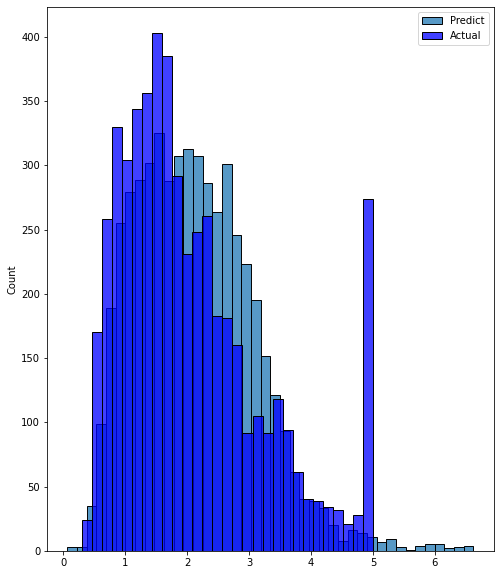

In [59]:
fig,ax_multi = plt.subplots(1,1,figsize = (8,10))
sns.histplot(y_pred_main, ax = ax_multi, color = 'red', label = 'Predict')
sns.histplot(y_test_reg, ax = ax_multi, color = 'blue', label = 'Actual')
ax_multi.legend()

<h2> Subclassing API </h2> 

The sequential and functional APIs are easy to save, clone, its structure can be displayed and analyszed, its framework can infer shapes and check types, errors can be caught early. This is because the model is a static graph of layers. 

However as it is a static graph of layers, it cannot train models involving loops, varying shapes, conditional branching and other dynamic behaviors. 

Instead we use the Subclass API

In [61]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        #only instantiates the layers
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output

Notice that now we have separated layer initialization from layer architecture. Hence we can call this function with the respective inputs whenever required during normal programming operations.

However now your model's architecture is hidden within the call() method. Hence we cannot clone or save the model. And we cannot inspect the summary of the model. Hence Sequential API and Functional API are safer options

In [62]:
#saving a Keras model
model_multi.save("multi_output_model.h5")

In [63]:
import h5py
model_h5 = h5py.File('multi_output_model.h5','r')
model_h5.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [66]:
model_h5['model_weights']

<HDF5 group "/model_weights" (7 members)>

There are 2 ways in which you can load a model. Either by loading the entire model or just the weights. Use load_weights to load only the weights. However here we have to create a model architecture which matches that of the weights.

In [68]:
"""
def create_model():
    .....model architecture...

model = create_model()
model.load_weights(weights_path/h5 file name)
"""

'\ndef create_model():\n    .....model architecture...\n\nmodel = create_model()\nmodel.load_weights(weights_path/h5 file name)\n'

Training a model can take several hours sometimes. It is important to ensure that you do not loose progress by not saving. Hence we have to save at checkpoints at regular intervals during training. For this we use callbacks

<h3> Using Callbacks </h3> 

The fit() method has a callback argument which accepts a keras.callbacks object which specifies when the model should save. We can specify whether to save after each epoch, each batch or end of training. 


In [69]:
#saves at end of each epoch. 
checkpoint_cb = keras.callbacks.ModelCheckpoint('multi_output_model_cb.h5')
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=checkpoint_cb)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4000 - dense_15_loss: 0.3707 - dense_16_loss: 0.6640 - val_loss: 0.3934 - val_dense_15_loss: 0.3637 - val_dense_16_loss: 0.6610
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3961 - dense_15_loss: 0.3665 - dense_16_loss: 0.6628 - val_loss: 0.3889 - val_dense_15_loss: 0.3589 - val_dense_16_loss: 0.6588
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3919 - dense_15_loss: 0.3624 - dense_16_loss: 0.6574 - val_loss: 0.3852 - val_dense_15_loss: 0.3549 - val_dense_16_loss: 0.6580
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3899 - dense_15_loss: 0.3606 - dense_16_loss: 0.6536 - val_loss: 0.3813 - val_dense_15_loss: 0.3510 - val_dense_16_loss: 0.6543
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3863 - dense_15_loss: 0.3568 - dense_16_loss: 0.6520 - val_loss: 0.3774 - val_dense_15_loss: 0.3470 - val_de

Saving at checkpoints allows us to only save a model with the best score on the validation set. 

In [71]:
#the two outputs have different weights for their losses. 
trainingdf = pd.DataFrame(data = history.history)
trainingdf

,loss,dense_15_loss,dense_16_loss,val_loss,val_dense_15_loss,val_dense_16_loss
0,0.400006,0.370676,0.663979,0.393407,0.363672,0.661017
1,0.396116,0.366481,0.662838,0.388852,0.358860,0.658781
2,0.391888,0.362391,0.657369,0.385246,0.354941,0.657988
3,0.389903,0.360600,0.653629,0.381293,0.350963,0.654267
4,0.386279,0.356754,0.652007,0.377371,0.347037,0.650377
5,0.387004,0.357934,0.648635,0.381217,0.351695,0.646912
6,0.380422,0.351034,0.644922,0.401009,0.374143,0.642801
7,0.378768,0.349654,0.640794,0.378443,0.349028,0.643176
8,0.376378,0.347057,0.640267,0.437197,0.411364,0.669699
9,0.416234,0.391464,0.639158,0.374835,0.345530,0.638582


In [73]:
model_multi.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         input_6[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
____________________________________________________________________________________________

In [75]:
trainingdf.loc[trainingdf["val_loss"] == trainingdf["val_loss"].min()]

,loss,dense_15_loss,dense_16_loss,val_loss,val_dense_15_loss,val_dense_16_loss
16,0.366228,0.338427,0.616441,0.364072,0.335905,0.617574


In [76]:
#saving the one with best score on the validation set

checkpoint_cb = keras.callbacks.ModelCheckpoint('multi_output_model_cb.h5', save_best_only=True)
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=checkpoint_cb)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3610 - dense_15_loss: 0.3339 - dense_16_loss: 0.6056 - val_loss: 0.3713 - val_dense_15_loss: 0.3449 - val_dense_16_loss: 0.6085
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3592 - dense_15_loss: 0.3318 - dense_16_loss: 0.6058 - val_loss: 0.3573 - val_dense_15_loss: 0.3294 - val_dense_16_loss: 0.6084
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3585 - dense_15_loss: 0.3316 - dense_16_loss: 0.6007 - val_loss: 0.3611 - val_dense_15_loss: 0.3342 - val_dense_16_loss: 0.6035
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3566 - dense_15_loss: 0.3296 - dense_16_loss: 0.5995 - val_loss: 0.4339 - val_dense_15_loss: 0.4152 - val_dense_16_loss: 0.6018
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3574 - dense_15_loss: 0.3308 - dense_16_loss: 0.5965 - val_loss: 0.3575 - val_dense_15_loss: 0.3303 - val_de

Another way to implement saving the iteration with the best score on the validation score is to use early stopping

Using the EarlyStopping callback
It will interrupt training when it measures no progress on the validation set for a number of epochs and also roll back to the best model.


In [77]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

#while checkpoint_cb saves the model(at end of each epoch by default) and saves only the best validation score if save_best_only = True
#early_stoppin checks if the validation score improves over 10 iterations after each previous 
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3446 - dense_15_loss: 0.3197 - dense_16_loss: 0.5688 - val_loss: 0.3446 - val_dense_15_loss: 0.3194 - val_dense_16_loss: 0.5713
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3440 - dense_15_loss: 0.3193 - dense_16_loss: 0.5657 - val_loss: 0.3588 - val_dense_15_loss: 0.3353 - val_dense_16_loss: 0.5703
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3430 - dense_15_loss: 0.3186 - dense_16_loss: 0.5621 - val_loss: 0.3498 - val_dense_15_loss: 0.3253 - val_dense_16_loss: 0.5706
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3445 - dense_15_loss: 0.3203 - dense_16_loss: 0.5625 - val_loss: 0.3495 - val_dense_15_loss: 0.3250 - val_dense_16_loss: 0.5697
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3424 - dense_15_loss: 0.3181 - dense_16_loss: 0.5610 - val_loss: 0.3430 - val_dense_15_loss: 0.3181 - val_de

In [80]:
#we can also write our own call backs
class PrintValTrainRatio(keras.callbacks.Callback):
    #on_epoch_end is a function belonging to Callback which has been inherited
    def on_epoch_end(self,epoch,logs):
        print("\n Val/Train : {}".format(logs["val_loss"]/logs["loss"]))

In [81]:
printvaltrain = PrintValTrainRatio()
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=[checkpoint_cb,early_stopping_cb,printvaltrain])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3336 - dense_15_loss: 0.3113 - dense_16_loss: 0.5345 - val_loss: 0.3486 - val_dense_15_loss: 0.3269 - val_dense_16_loss: 0.5437

 Val/Train : 1.0448644752567087
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3348 - dense_15_loss: 0.3126 - dense_16_loss: 0.5342 - val_loss: 0.3474 - val_dense_15_loss: 0.3258 - val_dense_16_loss: 0.5423

 Val/Train : 1.037793531054705
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3334 - dense_15_loss: 0.3113 - dense_16_loss: 0.5320 - val_loss: 0.3466 - val_dense_15_loss: 0.3251 - val_dense_16_loss: 0.5396

 Val/Train : 1.0394660177598376
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3322 - dense_15_loss: 0.3101 - dense_16_loss: 0.5309 - val_loss: 0.3411 - val_dense_15_loss: 0.3191 - val_dense_16_loss: 0.5392

 Val/Train : 1.0268540928370127
Epoch 5/20
363/363 [==============================] -

<h3> Tensorboard </h3> 

To use Tensorboard, we must modify the program such that it outputs the data we want to visualize to special binary log files called **event files**. Each binary record is called a summary. 

The Tensorboard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. 

Usually we want the TensorBoard server to point to a root log directory and configure the program to write to a different sub directory everytime it runs. 

In [ ]:
root_logdir = os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    #time.strftime is used when we are getting the data from a function like time.localtime()
    #time.strptime is used to convert an existing string of time to a format we want
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S", time.localtime())
    return os.path.join(root_logdir,run_id)

In [82]:
import time

In [83]:
time.localtime()

time.struct_time(tm_year=2021, tm_mon=4, tm_mday=2, tm_hour=22, tm_min=4, tm_sec=56, tm_wday=4, tm_yday=92, tm_isdst=0)

In [87]:
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S", time.localtime())

In [88]:
run_id

'run_2021_04_02-22_09_07'